In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#определение версии библиотеки
import sklearn
print(sklearn.__version__)

1.4.2


### Загружаем датасет

In [3]:
item = 'diamonds' # Выбрать из поля Item для вашего датасета
package = 'ggplot2' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


В рамках промежуточной аттестации 2 вами был проведен разведочный анализ данных и тестирование гипотез для выбранного датасета На основе проведенных наблюдений о взаимосвязи между переменными сформулируйте задачу классификации или регрессии, которая может иметь практическую ценность Разделите датасет на обучающую (60%) и тестовую (40%) выборки. Далее тестовую выборку разделите пополам (20% и 20%): a) Первая половина будет использоваться для оценки качества модели. Предполагается, что здесь вы знаете наблюдаемые значения таргета и можете сравнивать их с предсказаниями b) Вторая половина будет использоваться для построения прогнозов. Предполагается, что здесь значения таргета вам неизвестны – как в практической ситуации использования моделей прогнозирования. Обучите 3 различные модели, проведите оценку их качества на первой половине тестовой выборки Для повышения качества можете пользоваться следующими приемами: a) Нормализация и стандартизация показателей b) Подбор гиперпараметров c) Включение / исключение дополнительных переменных d) Трансформация переменных (квадраты, логарифмы и т.п.) Выберите ту модель и набор переменных, которые по вашему мнению дают наиболее удовлетворительное качество. На основе второй половины тестовой выборки сделайте предсказание целевой переменной. На основе предсказаний сделайте рекомендации для потенциальных пользователей вашего анализа

#### Очистка данных

In [11]:
#Вывод количества строк датасета
rows_count=len(df)
print(rows_count)

53940


In [9]:
#Просмотр пропущенных значений в каждом столбце
rows_nan=df.isnull().sum()
print(rows_nan)
#удаление дубликатов
dubl=df.drop_duplicates()
print(dubl)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.

In [152]:
#Вывод информации о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  size     53940 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


### Задача

В проведенных ранее наблюдениях была рассмотрена зависимость стоимости бриллианта от размера, чистоты и огранки камня. 
ЗАДАЧА: Спрогнозировать цену бриллианта на основе его характеристик.
Влияние огранки, веса, показателя чистоты бриллианта на его стоимость.

In [15]:
#добавляем столбец размер
df=df.assign(size=df['x']*df['y']*df['z'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [28]:
#удаляем столбцы, не участвующие в анализе
df=df.drop(['x', 'y', 'z', 'depth', 'table','color'], axis=1)
df.head()

,carat,cut,clarity,price,size
0,0.23,Ideal,SI2,326,38.202030
1,0.21,Premium,SI1,326,34.505856
2,0.23,Good,VS1,327,38.076885
3,0.29,Premium,VS2,334,46.724580
4,0.31,Good,SI2,335,51.917250


<Axes: xlabel='cut', ylabel='price'>

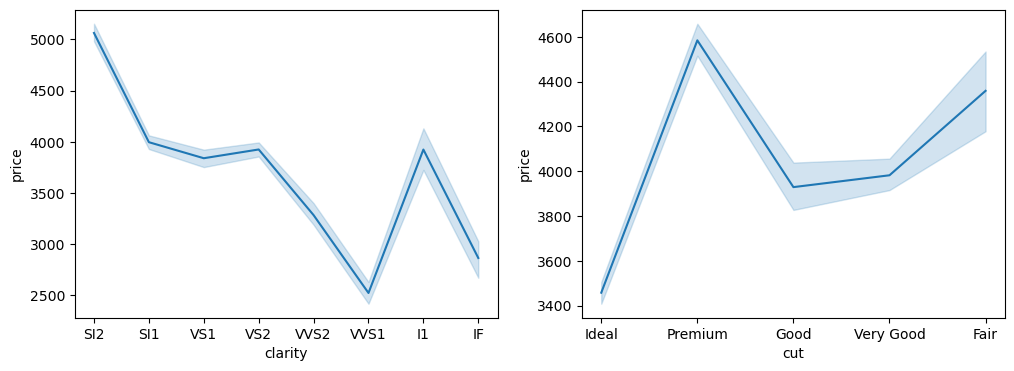

In [150]:
#взаимозависимость показателей чистоты и вида огранки бриллиантов от стоимости
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.lineplot(x = 'clarity', y = 'price', data = df, ax = ax[0])
sns.lineplot(x = 'cut', y = 'price', data = df, ax = ax[1])

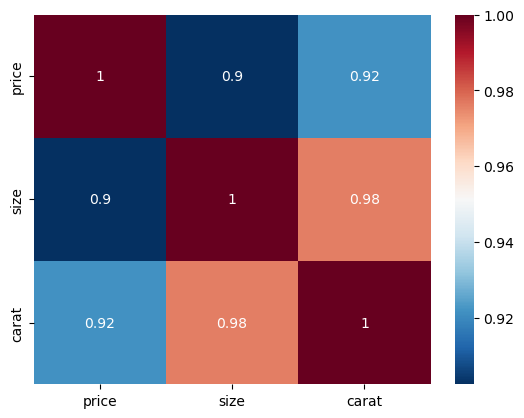

In [122]:
#Для числовых переменных выведем тепловую карта взаимозависимости показателей веса, размера бриллианта и его стоимости
cols=['price', 'size', 'carat']
hm=sns.heatmap(df[cols].corr(),cmap='RdBu_r', annot=True)

In [ ]:
Из графика видна сильная зависимость между ценой, размером и весом бриллианта. 

In [25]:
import numpy as np

#определяем массивы по типам показателей 
var1=['cut','clarity'] 
var2=['size', 'carat']
target_var = ['price']
#воспользуемся унитарным кодированием значений, чтобы избежать неверной интерпретации значений
var1_dummies = pd.get_dummies(df[var1], drop_first = True, dtype = int)
#вывод полученного фрейма без нулевых столбцов
var1_dummies.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,0


In [31]:
x = df[var2]
x = pd.merge(left = x, right = var1_dummies, how = 'inner', left_index = True, right_index = True)
y = df[target_var]

In [33]:
#первое деление выборки на тестовую-40% и обучающую-60% 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
splt_train1=x_train.shape
splt_test1=x_test.shape
#вывод результата
print(splt_train1, splt_test1)
#второе деление тестовой выборки пополам 20% и 20%
x_test, x_forecast, y_test, y_forecast = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)
splt_train2=x_test.shape
splt_test2=x_forecast.shape
#вывод результата
print(splt_train2, splt_test2)

(32364, 13) (21576, 13)
(10788, 13) (10788, 13)


### Обучение моделей

In [75]:
#Линейная регрессия методом OLS
from sklearn import linear_model
metod_ols = linear_model.LinearRegression()
#реализация метода
metod_ols.fit(x_train, y_train)

LinearRegression()

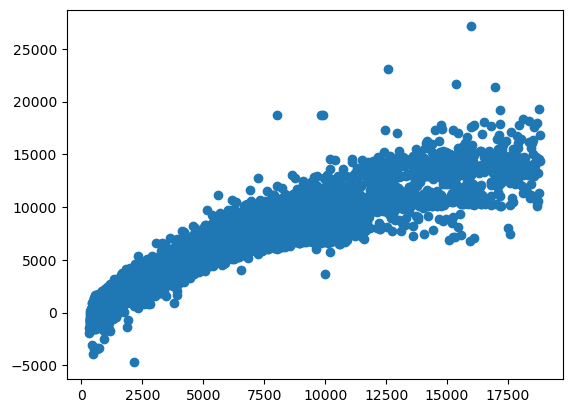

In [79]:
#строим прогноз
y_pred = metod_ols.predict(x_test)
#визуализация взаимосвязи
plt.scatter(y_test, y_pred)
plt.show()

Из диаграммы видно, что большинство предсказанных значений для y лежат на диагонали с углом в 45 градусов.

In [82]:
#Для регрессии мы будем оценивать качества модели с использованием следующих метрик
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('R2', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

R2 0.8947960973560711
MAE 851.7622827831611
RMSE 1283.5596824021216
MAPE 0.40337738162572356


Средняя абсолютная процентная ошибка (MAPE)=0,40 показывает,что среднее абсолютное отклонение прогнозируемых значений от фактических значений мало.
Коэффицент детерминации (R2)=0,89. Это говорит о том, что модель, делая свои прогнозы хорошо справляется с задачей. Cреднее абсолютное отклонение (MAE) 851,76. Данный показатель говорит, что модель приближает фактические данные неплохо и в среднем ошибается где-то на $851 при прогнозировании цен.
Среднеквадратичная ошибка (RMSE)=1283, что указывает на небольшие различия между фактическими и предсказанными значениями. Данный показатель чем меньше, тем лучше модель. Средняя абсолютная процентная ошибка (MAPE)=0,4%. Это показывает, что в среднем прогноз отклоняется от реальных значений на 0,4%

In [157]:
# Линейная регрессия методом SVM(опорных векторов)
from sklearn import svm
from sklearn import datasets
metod_svm = svm.SVR()
#преобразование значений в одномерный массив для устранения ошибки вывода в модели
metod_svm.fit(x_train, y_train.values.ravel())

SVR()

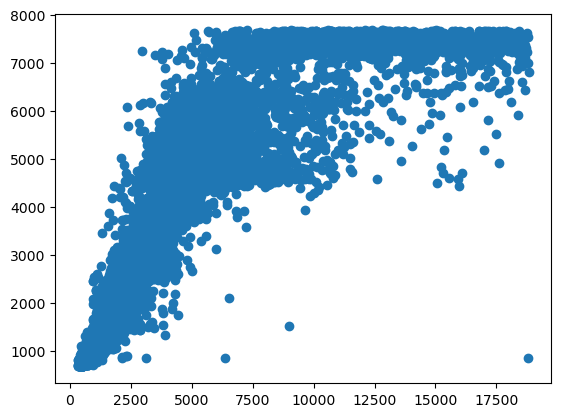

In [158]:
#строим график прогноза взаимозовисимости
y_pred = metod_svm.predict(x_test)
#визуализация 
plt.scatter(y_test, y_pred)
plt.show()

In [159]:
#оценка качества модели с использованием описанных выше метрик
print('R2', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

R2 0.6592432078095314
MAE 1122.3874504731714
RMSE 2310.055437585972
MAPE 0.2437788310700504


Коэффицент R2=0,65. Данный показатель не дотягивает до 0,80,что означает - модель является удовлетворительной.

In [ ]:
# Регрессия методом решающих деревьев (DecisionTreeRegressor)
from sklearn import tree
model_tree = tree.DecisionTreeRegressor()
model_tree.fit(x_train, y_train)

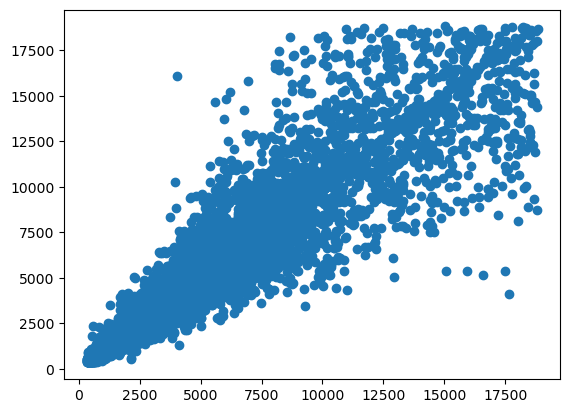

In [161]:
y_pred = model_tree.predict(x_test)
#визуализация дерева
plt.scatter(y_test, y_pred)
plt.show()

Из диаграммы видно, что большинство предсказанных значений для y лежат на диагонали с углом в 45 градусов.

In [114]:
print('R2', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

R2 0.8841948704854017
MAE 680.7246539364726
RMSE 1346.678851925352
MAPE 0.17464230265133446


In [167]:
#проверка отклонения
otk=680/df['price'].mean()
print(otk)

0.172904812876968


Коэффицент R2=0,88. Это говорит о том, что модель получилась хорошая. Cреднее абсолютное отклонение MAE= 680,72. Данный показатель говорит, что модель в среднем ошибается где-то на $680 при прогнозировании цен и в среднем прогноз отклоняется от реальных значений на 0,2%.

ВЫВОД: Модель 3 получилась самая лучшая. Вероятность ошибки составляет 0,2%. Отклонение от реальных цен в среднем достигает $680, что составляет 17% от средней стоимости бриллианта по данным датасета.